# Number 2 of ANOVA and regression problem

**The problem to be addressed is:**

Another student conducted an experiment evaluating the effect of sugar concentration on growth of E. coli in lab cultures. Using the data in sugar.txt, generate a plot that summarizes the results and test for an effect of sugar concentration on growth of E. coli using a regression-design linear model and likelihood ratio test.

##### The data set used in this problem is sugar.csv

This dataset describes the effect of sugar on the growth of *E.coli*. In the first column the header is "sugar" and has corresponding amounts of sugar. In the second column the title is "growth" with the corresponding numbers for growth. 


We'll first generate pseudocode to help deconstruct the problem. 


In [5]:
#import the necessary packages 

#load the data 

#subset the data as needed

#generate a plot that summarizes the results and test for an effect of sugar concentration on growth of E. coli using a regression-design linear model ##use ggplot 

#perform maximum likelihood calculations for D and P values


### Now for the code

#### Import necessary packages and load the data 

In [6]:
import numpy
import pandas 
import scipy
import scipy.integrate as spint
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.stats import chi2
import plotnine
from plotnine import *

#Load Data
data=pandas.read_csv("sugar.csv")

## Part 2: Linear regression model 

Use ggplot to plot linear regression of data. 

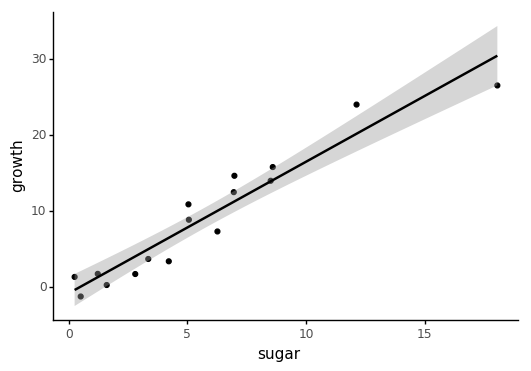

<ggplot: (289821889)>


In [3]:
import numpy
import pandas 
import scipy
import scipy.integrate as spint
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.stats import chi2
import plotnine
from plotnine import *

#Load Data
data=pandas.read_csv("sugar.csv")
plot1= ggplot(data,aes(x="sugar",y="growth"))+theme_classic()+geom_point()+stat_smooth(method="lm")
print plot1

## Test Null Hypothesis Using Likelihood Ratio Test


In [4]:
dataFrame=pandas.DataFrame({'y':data.growth,'x':data.sugar})

#Define null hypothesis 
def nllikeNull(p,obs):
    B0=p[0]
    sigma=p[1]
    
    expected=B0
    nll=-1*norm(expected,sigma).logpdf(obs.y).sum()
    return nll
    
# estimate parameters by minimizing the NLL for data
initialGuess=numpy.array([15,1])
fitNull=minimize(nllikeNull,initialGuess,method="Nelder-Mead",options={'disp': True},args=dataFrame)
nllNull= fitNull.fun #gives NLL value for null
print("Null model negative log liklihood value = ")
print(nllNull)

Optimization terminated successfully.
         Current function value: 56.241197
         Iterations: 53
         Function evaluations: 103
Null model negative log liklihood value = 
56.2411971986


## Test Alternative Hypothesis Using Likelihood Ratio Test

In [5]:
dataFrame=pandas.DataFrame({'y':data.growth,'x':data.sugar})

#Define Alternative
def nllikeAlt(p,obs):
    B0=p[0]
    B1=p[1]
    sigma=p[2]
    
    expectedAlt=B0+B1*obs.x
    nll=-1*norm(expectedAlt,sigma).logpdf(obs.y).sum()
    return nll
    
# estimate parameters by minimizing the NLL for data
initialGuess=numpy.array([0,2,1])
fitAlt=minimize(nllikeAlt,initialGuess,method="Nelder-Mead",options={'disp': True},args=dataFrame)
nllAlt= fitAlt.fun #gives NLL value for null
print("Alternative model negative log liklihood value = ") 
print(nllAlt)

Optimization terminated successfully.
         Current function value: 36.278639
         Iterations: 181
         Function evaluations: 323
Alternative model negative log liklihood value = 
36.2786386193
